In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from datetime import datetime
import pytz
import gc


In [2]:
# Define list of dataset
dir = '../dataset/'
datasets = [file for file in Path(dir).glob('*.csv') if file.name == 'best_dataset.csv']

datasets


[PosixPath('../dataset/best_dataset.csv')]

In [3]:
# Helper function to load data
def load_data(filename):
    print(filename)

    df = pd.read_csv(filename, header=None, encoding='utf-8').dropna()
    df.columns = ['label', 'data']

    global X, y

    X = df['data']
    y = df['label']


In [4]:
# Helper function to create train val test split
def split_dataset(X, y):
    global X_train, y_train, X_val, y_val, X_test, y_test

    # train 7 : val 2 : test 1
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, random_state=7)


In [5]:
# Helper function to extract feature
def extract_feature(vectorizer, X):
    vectorizer.fit(X)

    global X_train, X_val, X_test

    X_train = vectorizer.transform(X_train).toarray()
    X_val = vectorizer.transform(X_val).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    print(X_train.shape)
    print(X_val.shape)
    print(X_test.shape)


In [6]:
def useClassifier(classifier):
    try:
        print(classifier)

        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_pred)

        print(val_accuracy)

        y_pred = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)

        print(test_accuracy)

        del classifier

        gc.collect()
    except Exception as inst:
        print('Something went wrong...')
        print(type(inst))  # the exception type
        print(inst.args)  # arguments stored in .args
        print(inst)  # __str__ allows args to be printed directly


def useAllClassifier():
    useClassifier(AdaBoostClassifier(n_estimators=50, random_state=0))
    useClassifier(AdaBoostClassifier(n_estimators=100, random_state=0))
    useClassifier(AdaBoostClassifier(n_estimators=150, random_state=0))
    useClassifier(DecisionTreeClassifier(random_state=0))
    useClassifier(DecisionTreeRegressor(random_state=0))
    useClassifier(GaussianNB())
    useClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0))
    useClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, random_state=0))
    useClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=0))
    useClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.75, random_state=0))
    useClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0))
    useClassifier(KMeans(n_clusters=2, random_state=0, n_init='auto'))
    useClassifier(KNeighborsClassifier(n_neighbors=3))
    useClassifier(KNeighborsClassifier(n_neighbors=5))
    useClassifier(LogisticRegression(random_state=0))
    useClassifier(MultinomialNB())
    useClassifier(RandomForestClassifier(n_estimators=10, random_state=0))
    useClassifier(RandomForestClassifier(n_estimators=50, random_state=0))
    useClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
    useClassifier(SGDClassifier(max_iter=1000, tol=1e-3))


In [7]:
def resetGlobalVar():
    X = None
    y = None
    X_train = None
    y_train = None
    X_val = None
    y_val = None
    X_test = None
    y_test = None

resetGlobalVar()

In [8]:
for i, dataset in enumerate(datasets):
    print(i)
    print(datetime.now(pytz.timezone('Asia/Hong_Kong')).strftime('%Y-%m-%d %H:%M:%S'))

    load_data(dataset)

    print('CountVectorizer()')

    split_dataset(X, y)
    extract_feature(CountVectorizer(), X)
    useAllClassifier()


0
2023-07-15 16:01:45
../dataset/best_dataset.csv
CountVectorizer()
(23082, 42852)
(6628, 42852)
(3265, 42852)
AdaBoostClassifier(random_state=0)


KeyboardInterrupt: 

In [9]:
for i, dataset in enumerate(datasets):
    print(i)
    print(datetime.now(pytz.timezone('Asia/Hong_Kong')).strftime('%Y-%m-%d %H:%M:%S'))

    load_data(dataset)

    print('TfidfVectorizer()')

    split_dataset(X, y)
    extract_feature(TfidfVectorizer(), X)
    useAllClassifier()


0
2023-06-27 20:50:27
..\dataset\best_dataset.csv
TfidfVectorizer()
(23082, 42852)
(6628, 42852)
(3265, 42852)
AdaBoostClassifier(random_state=0)
0.9367833433916717
0.9359877488514549
AdaBoostClassifier(n_estimators=100, random_state=0)
0.9518708509354254
0.9503828483920368
AdaBoostClassifier(n_estimators=150, random_state=0)
0.9580567290283645
0.9595712098009188
DecisionTreeClassifier(random_state=0)
0.944176222088111
0.9491577335375191
DecisionTreeRegressor(random_state=0)
Something went wrong...
<class 'ValueError'>
("Classification metrics can't handle a mix of binary and continuous targets",)
Classification metrics can't handle a mix of binary and continuous targets
GaussianNB()
0.9429692214846107
0.9399693721286371
GradientBoostingClassifier(random_state=0)
0.9266747133373566
0.9252679938744257
GradientBoostingClassifier(learning_rate=0.25, random_state=0)
0.9447797223898612
0.9430321592649311
GradientBoostingClassifier(learning_rate=0.5, random_state=0)
0.9532287266143633
0.9506

In [9]:
for i, dataset in enumerate(datasets):
    print(i)
    print(datetime.now(pytz.timezone('Asia/Hong_Kong')).strftime('%Y-%m-%d %H:%M:%S'))

    load_data(dataset)

    print('HashingVectorizer(n_features=50000)')

    split_dataset(X, y)
    extract_feature(HashingVectorizer(n_features=50000), X)
    useAllClassifier()


0
2023-07-15 16:02:12
../dataset/best_dataset.csv
HashingVectorizer(n_features=50000)
(23082, 50000)
(6628, 50000)
(3265, 50000)
AdaBoostClassifier(random_state=0)


In [8]:
# Plot confusion matrix and graph
def plot_confusion_matrix(y, y_pred, type, target_names = ['Ham', 'Spam']):
    print('Confusion matrix - ' + type)
    print(classification_report(y, y_pred, target_names=target_names))

    # Plot the confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - ' + type)
    plt.show()

In [9]:
# Check confusion matrix given dataset and model
# According to interim report, Multinomial NB is best, evaluate confusion
def evaluateDatasetConfusionMatrix(dataset, model):
    resetGlobalVar()
    load_data(dataset)
    split_dataset(X, y)
    extract_feature(HashingVectorizer(n_features=50000), X)
    # Retrain model
    model.fit(X_train, y_train)
    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
    y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
    plot_confusion_matrix(y_val, y_val_pred, 'Validation')
    plot_confusion_matrix(y_test, y_test_pred, 'Testing')

../dataset/best_dataset.csv
(23082, 50000)
(6628, 50000)
(3265, 50000)
Confusion matrix - Validation
              precision    recall  f1-score   support

         Ham       0.97      0.99      0.98      3093
        Spam       0.99      0.98      0.98      3535

    accuracy                           0.98      6628
   macro avg       0.98      0.98      0.98      6628
weighted avg       0.98      0.98      0.98      6628



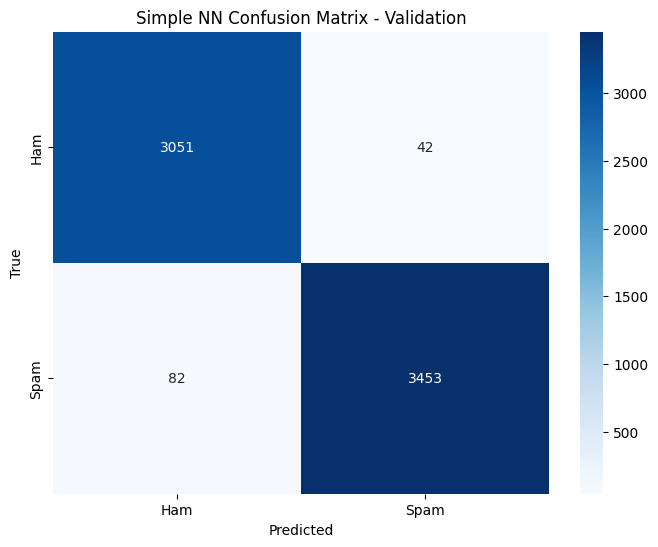

Confusion matrix - Testing
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98      1490
        Spam       0.98      0.98      0.98      1775

    accuracy                           0.98      3265
   macro avg       0.98      0.98      0.98      3265
weighted avg       0.98      0.98      0.98      3265



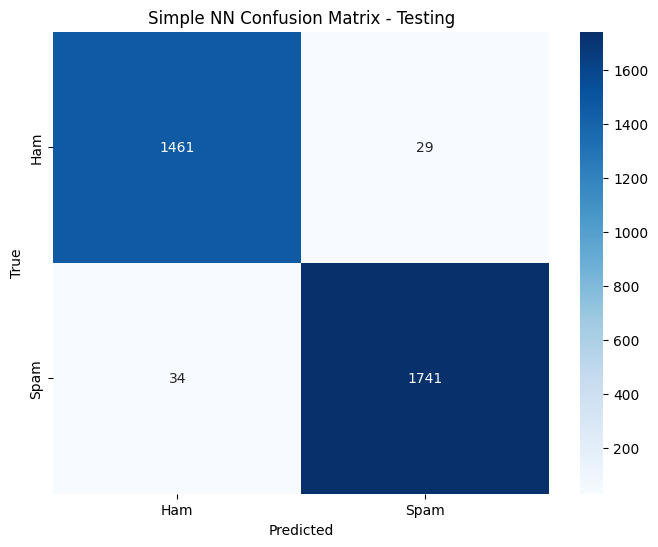

In [11]:
# Evaluate confusion for one of the model, this function retrain the model since classifier is not kept
evaluateDatasetConfusionMatrix('../dataset/best_dataset.csv' ,SGDClassifier(max_iter=1000, tol=1e-3))